In [29]:
import os 
import re
import ast
import anndata as ad 
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi_save = 300)

In [9]:
ad_ge = ad.read_h5ad('/sbgenomics/project-files/tangram_integration/HTAPP-313-SMP-932_fresh_channel1_ad_ge.h5ad')
ad_map = ad.read_h5ad('/sbgenomics/project-files/tangram_integration/HTAPP-313-SMP-932_fresh_channel1_ad_map.h5ad')
merfish_celltypes = ad.read_h5ad('/sbgenomics/project-files/HTAPP-313_centroids_celltyped.h5ad')

In [26]:
ad_map.obs

,cell_groups,cell_type
AAACCCAAGATGCGAC-1,MBC,MBC
AAACCCAAGCACACAG-1,MBC,MBC
AAACCCAGTATGGTAA-1,B_plasma,B_plasma
AAACCCAGTGGATACG-1,MBC,MBC
AAACCCAGTTATCCAG-1,T,T
...,...,...
TTTGGTTTCTCCGAAA-1,Monocyte,Monocyte
TTTGGTTTCTGGTGGC-1,MBC,MBC
TTTGTTGAGATCCCAT-1,MBC,MBC
TTTGTTGAGGACAAGA-1,MBC,MBC


In [10]:
ad_ge.obs['cell_type'] = list(merfish_celltypes.obs['cell_type'])

In [19]:
adata = ad_ge

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


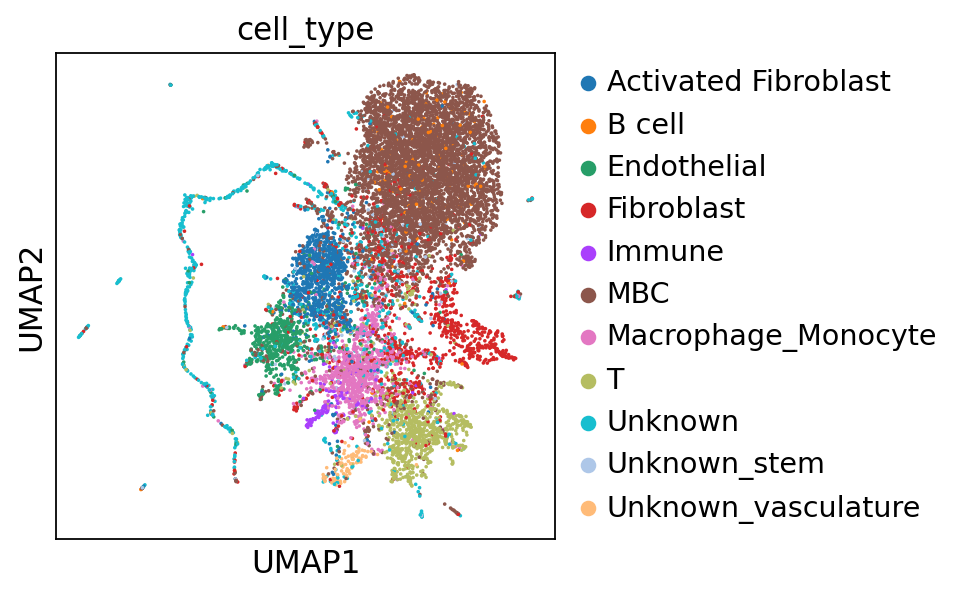

In [31]:
sc.pl.umap(adata, color = 'cell_type', save = 'tangram_313_scRNAfeatures_merfishlabels_umap.png')

In [36]:
adata.X = adata.X.clip(0,10)

categories: Activated Fibroblast, B cell, Endothelial, etc.
var_group_labels: MBC, B cell, Endothelial, etc.


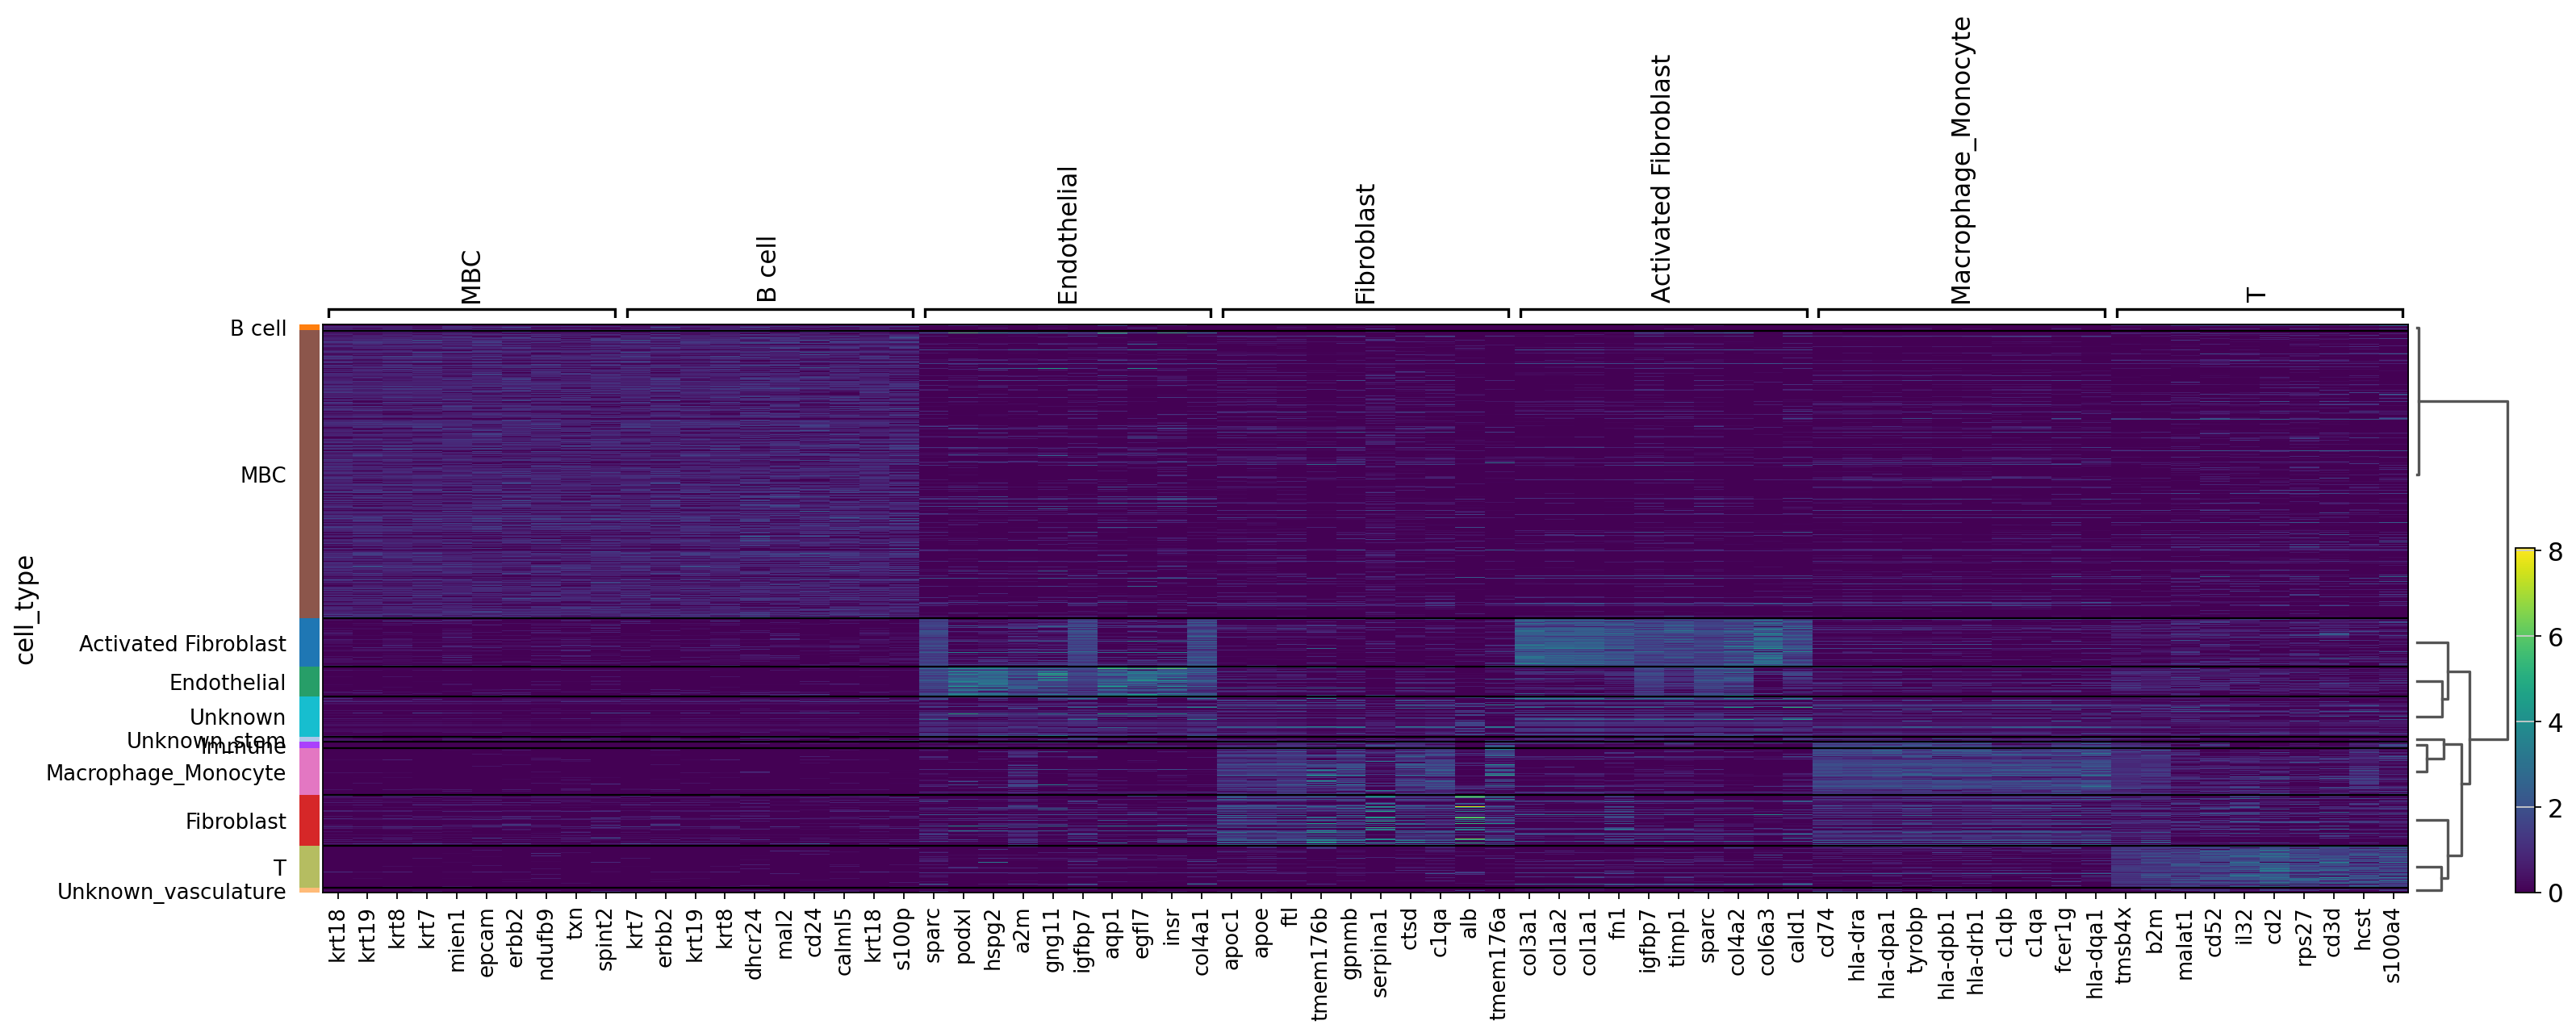

In [38]:
sc.tl.rank_genes_groups(adata, "cell_type", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, 
                                groups=['MBC','B cell','Endothelial','Fibroblast',
                                        'Activated Fibroblast','Macrophage_Monocyte','T'], 
                                n_genes=10, groupby="cell_type", show_gene_labels=True,
                               save = 'tangram_313_scRNAfeatures_merfishlabels_heatmap.png')